# import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
import import_ipynb
os.chdir(os.getcwd()+'\\Modules')
from time_shifted_PID import PIfunc
%matplotlib inline

importing Jupyter notebook from time_shifted_PID.ipynb


In [2]:
def nc(x):
    x = x.astype(float)
    return (x-np.mean(x))/np.std(x)

# Main

In [3]:
dt = 0.01
Tot=300
T=np.arange(dt,Tot,dt)
tau= 1
D = 0.027#*10**5
OU=np.zeros(len(T))
OUv=np.zeros(len(T))
noise=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    noise[i] = math.sqrt(D*dt)*np.random.normal(mu,sigma)
    OUv[i]=-dt/tau*OU[i] + noise[i]
    OU[i+1]=OU[i]+OUv[i]
OUv = OUv/dt
# OU = nc(OU)


In [4]:
x = nc(OU)
v = ndimage.gaussian_filter1d(x.copy(), sigma=1, order=1, mode='reflect') / dt
# v = np.append(0,(np.diff(x)/dt))

0.06


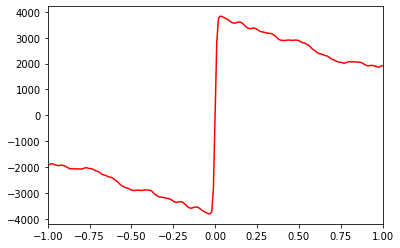

In [5]:
xSTA = np.correlate(nc(x), nc(v), 'same')#/ np.correlate(np.ones_like(x1), rstate, 'same')
plt.plot(T-np.mean(T), xSTA, 'r')
plt.xlim([-1,1])
print((np.argmax(xSTA)-np.argmin(xSTA))*dt)

0.01


False

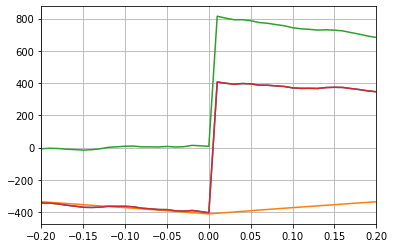

In [19]:
xSTA = np.correlate(OU, OUv, 'same')#/ np.correlate(np.ones_like(x1), rstate, 'same')
xSTA2 = -1/tau*np.correlate(OU, OU, 'same')#/ np.correlate(np.ones_like(x1), rstate, 'same')
xSTA3 = +1/dt*np.correlate(OU, noise, 'same')
plt.plot(T-np.mean(T), xSTA)
plt.plot(T-np.mean(T), xSTA2)
plt.plot(T-np.mean(T), xSTA3)
plt.plot(T-np.mean(T), xSTA2+xSTA3)
plt.xlim([-0.2,0.2])
plt.grid()
print((np.argmax(xSTA)-np.argmin(xSTA))*dt)
(xSTA == xSTA2+xSTA3).all()

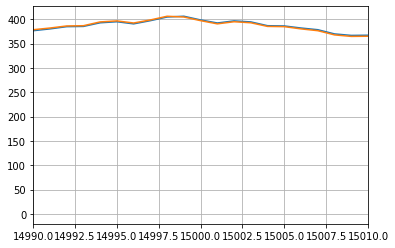

In [23]:
plt.plot(np.abs(xSTA)[1:])
plt.plot(np.flip(np.abs(xSTA)))
plt.xlim([14990,15010])
plt.grid()

False

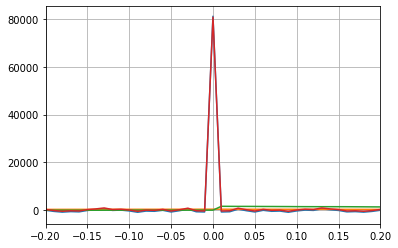

In [14]:
xSTA4 = np.correlate(OUv, OUv, 'same')
xSTA5 = 1/tau/tau*np.correlate(OU, OU, 'same')#/ np.correlate(np.ones_like(x1), rstate, 'same')
xSTA6 = +1/dt/dt*np.correlate(noise, noise, 'same')
plt.plot(T-np.mean(T), xSTA4)
plt.plot(T-np.mean(T), xSTA5)
plt.plot(T-np.mean(T), 2/tau*xSTA3)
plt.plot(T-np.mean(T), xSTA6)
plt.xlim([-0.2,0.2])
plt.grid()
(xSTA4 == xSTA5+2/tau*xSTA3+xSTA6).all()

In [7]:
x_cor = np.correlate(OU, OU, "same")
x_cor = x_cor[:int((len(x_cor)+1)/2)+1]
Taxis = np.flip(T[:len(x_cor)]-dt/2)
t_cor = np.interp(0.5*max(x_cor),  x_cor, Taxis)
t_cor

0.6433090540271106